In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/qf/znkw8q012f9d5c75hlcsjrqh0000gn/T/ipykernel_31917/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

#confirm
mea=session.query(Measurement).first()
mea.__dict__
#(yay!)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x175530410>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
rd = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
rd

('2017-08-23',)

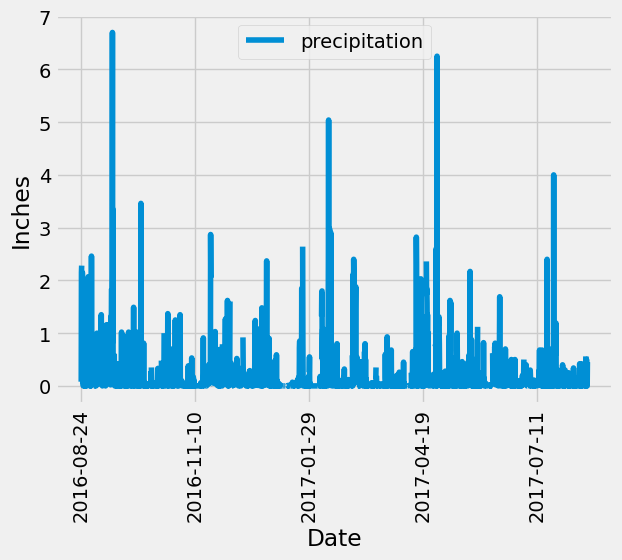

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
pre_12_months = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precip_df = pd.DataFrame(pre_12_months, columns=['date', 'precipitation'])

# Sort the dataframe by date
date_precip_df= date_precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
date_precip_df.plot(x='date', y='precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest temp is {lowest_temp}, highest is {highest_temp}, and average is {avg_temp}')

The lowest tempt is [(54.0,)], highest is [(85.0,)], and average is [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

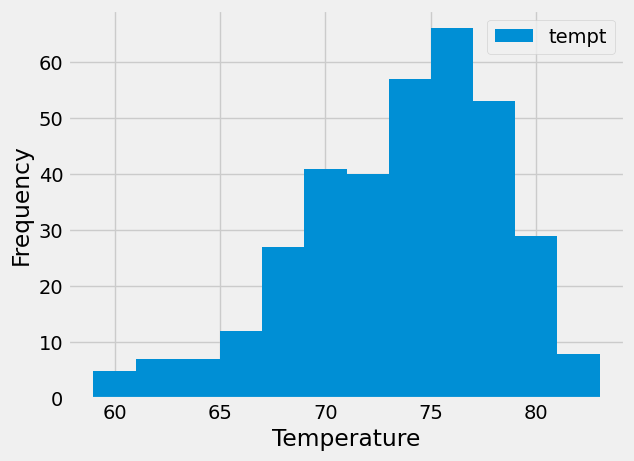

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempt_obs = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all(), columns=['tempt'])
tempt_obs.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()